In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# 1. Load dataset
df = pd.read_csv("/content/iris (1).csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


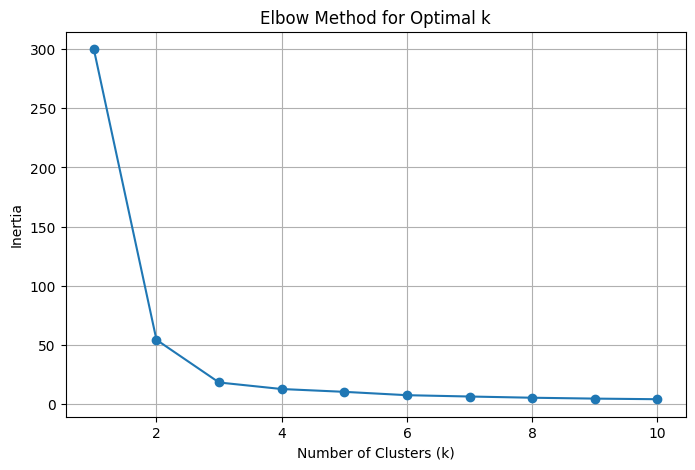

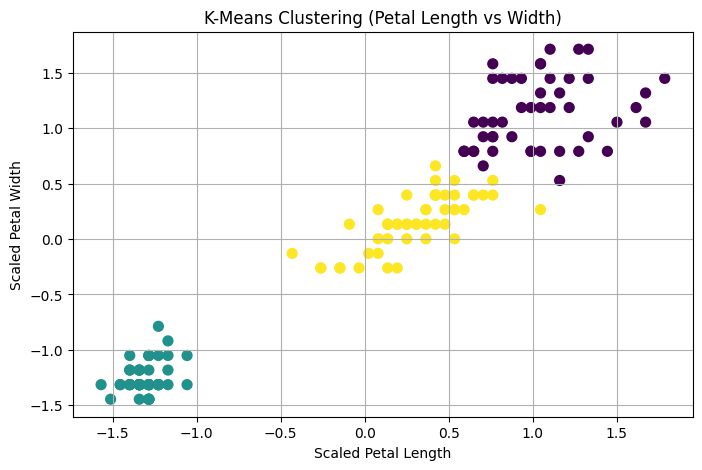

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# 1. Load dataset correctly, letting pandas infer the header
df = pd.read_csv("/content/iris (1).csv")

# 2. Use only petal length and petal width (using actual column names)
X = df[["petal_length", "petal_width"]]

# 3. Preprocessing - Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4. Elbow Method to find optimal k
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot Elbow graph
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.title("Elbow Method for Optimal k")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()

# 5. Choose optimal k (e.g., from elbow plot, suppose it's 3)
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# 6. Add cluster labels to dataframe and plot clusters
df["Cluster"] = clusters

plt.figure(figsize=(8, 5))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap='viridis', s=50)
plt.title("K-Means Clustering (Petal Length vs Width)")
plt.xlabel("Scaled Petal Length")
plt.ylabel("Scaled Petal Width")
plt.grid(True)
plt.show()